### Building our first Neural Network

In [73]:
## Importing Essential Libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [43]:
## Loading the number dataset
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [44]:
## Checking the shape of examples in each set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [45]:
## Checking the 1st example of training set
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [46]:
## Normalizing the values
X_train = X_train / 255
X_test = X_test / 255

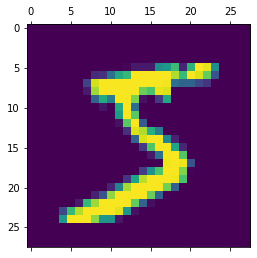

In [47]:
## Visualizing the 1st example of training set
plt.matshow(X_train[0])

In [48]:
## Flatteing the array as we cannot feed 2D array to our Neural Network
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

## Checking the shape after flattening
X_train_flattened.shape, X_test_flattened.shape

((60000, 784), (10000, 784))

In [49]:
## Checking the elements after reshaping
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

#### Initiating the Neural Network without Hidden Layer

In [50]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape = (784,), activation="sigmoid")
])

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4698 - accuracy: 0.8779
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3033 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2826 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2728 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2660 - accuracy: 0.9259


In [51]:
## Checking accuracy on testing set
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2656 - accuracy: 0.9257


[0.26561471819877625, 0.9257000088691711]

#### Visualizing Predictions 

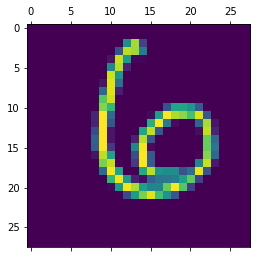

In [53]:
## Plotting the 100th instance
plt.matshow(X_test[100])

In [57]:
## Predicting the 100th example
y_pred = model.predict(X_test_flattened)
y_pred[100]

313/313 [==============================] - 1s 1ms/step


array([0.00711938, 0.02168191, 0.55699414, 0.02638487, 0.01058551,
       0.00119199, 0.984595  , 0.00140569, 0.01766252, 0.00196581],
      dtype=float32)

In [59]:
## Checking the maximum probability among all the classes
np.argmax(y_pred[100])

6

### Determining elements of Confusion Matrix

In [65]:
## Checking the first five values
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [68]:
## Creating labels from probabilities of each class in each instance
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [74]:
## Calculating Confusion Matrix
cm = tf.math.confusion_matrix(y_test, y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    0,    2,    0,    4,    7,    3,    1,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   7,    9,  928,   14,    7,    2,   13,   10,   38,    4],
       [   4,    0,   20,  919,    0,   23,    3,   10,   23,    8],
       [   1,    1,    5,    1,  895,    0,   12,    4,   10,   53],
       [  10,    3,    2,   36,    8,  763,   16,    8,   38,    8],
       [   9,    3,    6,    1,    7,   10,  918,    2,    2,    0],
       [   1,    6,   24,    6,    3,    0,    0,  946,    2,   40],
       [   7,    8,    6,   18,    9,   19,   10,   11,  879,    7],
       [  10,    7,    1,   11,   16,    6,    1,   17,    7,  933]])>

Text(69.0, 0.5, 'Truth')

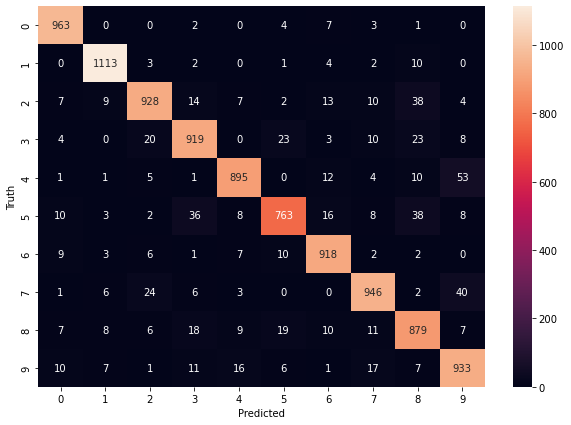

In [76]:
## Plotting Confusion Matrix
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Initiating the Neural Network with 1 Hidden Layer

In [77]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape = (784,), activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2827 - accuracy: 0.9189
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1287 - accuracy: 0.9618
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0904 - accuracy: 0.9727
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0687 - accuracy: 0.9791
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0545 - accuracy: 0.9830


In [78]:
## Checking accuracy on testing set
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0795 - accuracy: 0.9761


[0.07953888922929764, 0.9761000275611877]

313/313 [==============================] - 0s 1ms/step


Text(69.0, 0.5, 'Truth')

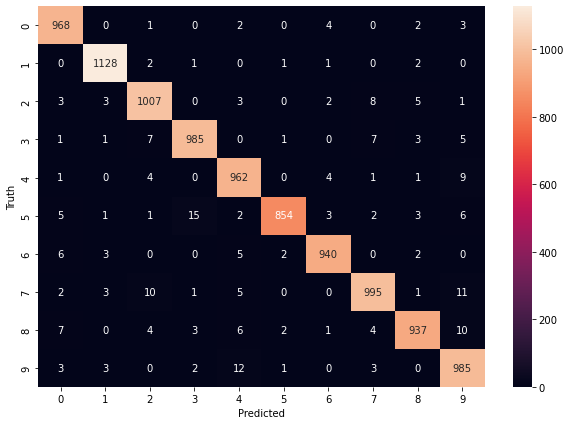

In [81]:
## Predicting values
y_pred = model.predict(X_test_flattened)

## Creating labels from probabilities of each class in each instance
y_pred_labels = [np.argmax(i) for i in y_pred]

## Calculating Confusion Matrix
cm = tf.math.confusion_matrix(y_test, y_pred_labels)

## Plotting Confusion Matrix
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Initiating the Neural Network with 1 Hidden Layer (Without Flattening)

In [83]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2677 - accuracy: 0.9244
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1206 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0832 - accuracy: 0.9748
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0648 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0493 - accuracy: 0.9847


In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

model.fit(X_train, y_train, epochs = 5)